In [1]:
#!pip install git+https://github.com/madhuhegde/diffusers.git
!pip install /Users/madhuhegde/work/diffusion/LDM/super_resolution

Processing /Users/madhuhegde/work/diffusion/LDM/super_resolution
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for latent-diffusion: filename=latent_diffusion-0.1.0.dev0-py3-none-any.whl size=2486680 sha256=e00cecace864fafb18e79e680c5e4118a5100ee6e08bafa34d5a2e8b345a9f63
  Stored in directory: /private/var/folders/2h/l5d7t83505v2q98ksvtcld1m0000gn/T/pip-ephem-wheel-cache-il8n71tj/wheels/bf/94/bc/63799524f13096e0a690fd103e8b00662178eb3636a2575817
Successfully built latent-diffusion
  Attempting uninstall: latent-diffusion
    Found existing installation: latent-diffusion 0.1.0.dev0
    Uninstalling latent-diffusion-0.1.0.dev0:
      Successfully uninstalled latent-diffusion-0.1.0.dev0


In [2]:
import requests
from PIL import Image
from io import BytesIO
from latent_diffusion import LDMSuperResolutionPipeline
import torch
device = "cpu" #"cuda" if torch.cuda.is_available() else "cpu"
model_id = "CompVis/ldm-super-resolution-4x-openimages"

# load model and scheduler
pipeline = LDMSuperResolutionPipeline() #.from_pretrained(model_id)
#pipeline = pipeline.to(device)

/Users/madhuhegde/anaconda3/envs/torch_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ResnetBlock2D(
  (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
  (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
  (dropout): Dropout(p=0.0, inplace=False)
  (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (nonlinearity): SiLU()
)
ResnetBlock2D(
  (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
  (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm2): GroupNorm(32, 256, eps=1e-06, affine=True)
  (dropout): Dropout(p=0.0, inplace=False)
  (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (nonlinearity): SiLU()
  (conv_shortcut): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
)
ResnetBlock2D(
  (norm1): GroupNorm(32, 256, eps=1e-06, affine=True)
  (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm2): GroupNorm(32, 512, eps=1e-06, affine=True)
  (dropout): Dropout(p=0.

In [3]:
#import torch
PATH = "/Users/madhuhegde/work/diffusion/LDM/hf_vqvae_model.pt" #"VQ_model_dict.pt"
#torch.save(pipeline.vqvae.state_dict(), PATH)
pipeline.vqvae.load_state_dict(torch.load(PATH,map_location=torch.device('cpu')))

PATH = "/Users/madhuhegde/work/diffusion/LDM/hf_unet_model.pt"
#torch.save(pipeline.unet.state_dict(), PATH)
pipeline.unet.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))

<All keys matched successfully>

In [4]:
url = "https://user-images.githubusercontent.com/38061659/199705896-b48e17b8-b231-47cd-a270-4ffa5a93fa3e.png"
response = requests.get(url)
low_res_img = Image.open(BytesIO(response.content)).convert("RGB")
low_res_img = low_res_img.resize((64, 64))

# run pipeline in inference (sample random noise and denoise)
upscaled_image = pipeline(low_res_img, num_inference_steps=100, eta=1).images[0]
# save image
upscaled_image.save("ldm_generated_image.png")

100%|█████████████████████████████████████████| 100/100 [00:45<00:00,  2.19it/s]


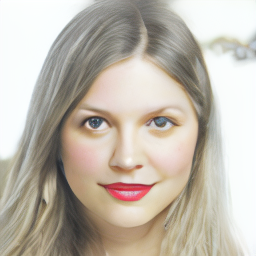

In [5]:
upscaled_image